# Auto-annotate plasmids

This notebook shows how to auto-annotate a plasmid using a reference sequence dataset and [GeneBlocks](https://edinburgh-genome-foundry.github.io/Geneblocks). For this demonstration, we download a reference set from the SnapGene website (www.snapgene.com/resources). Note that these files may be used without restriction by academic, nonprofit, and governmental entities.

In [3]:
import urllib.request

url = 'https://www.snapgene.com/local/fetch.php?set=basic_cloning_vectors&zip'
file_name = 'Basic_Cloning_Vectors.zip'
urllib.request.urlretrieve(url, file_name)

import zipfile
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

Choose a few of these files to build the reference dataset:

In [1]:
import os
import easy_dna
directory = "Basic Cloning Vectors"
vector_names = [
    "lac operator",
    "lac promoter",
    "lac UV5 promoter",
    "lacZ",
    "SP6 promoter",
    "SV40 promoter",
    "T3 promoter",
    "T5 promoter",
    "T7 promoter",
    "tac promoter",
    "trc promoter",
]
vector_names = [vector + ".dna" for vector in vector_names]
vector_filepaths = [os.path.join(directory, vector) for vector in vector_names]
vectors = easy_dna.records_from_data_files(filepaths=vector_filepaths)

---
Download a plasmid, then remove its annotation:

In [4]:
file_name = 'pT7Blue.dna'

In [62]:
# url = 'https://raw.githubusercontent.com/Edinburgh-Genome-Foundry/Geneblocks/master/examples/sequences/features_transfer/plasmid_to_annotate.gb'
url = 'https://www.snapgene.com/local/fetch.php?set=basic_cloning_vectors&plasmid=pT7Blue'
urllib.request.urlretrieve(url, file_name)

In [5]:
plasmid = easy_dna.load_record(file_name)

from geneblocks import CommonBlocks, load_record
from dna_features_viewer import BiopythonTranslator
import matplotlib.pyplot as plt

(<AxesSubplot:>,
 ({GF(AmpR, 870-1731 (1)): 1.0,
   GF(ori, 1901-2490 (1)): 1.0,
   GF(f1 ori, 283-739 (-1)): 1.0,
   GF(AmpR promoter, 765-870 (1)): 1.0,
   GF(lac promoter, 2813-2844 (1)): 1.0,
   GF(T7 promoter, 23-42 (1)): 1.0,
   GF(M13 fwd, 125-142 (-1)): 1.0,
   GF(lac operator, 2851-2868 (0)): 1.0,
   GF(M13 rev, 4-2876 (1)): 0,
   GF(MCS, 44-125 (0)): 1.0,
   GF(LacZα, 0-333 (1)): 2.0},
  {GF(AmpR promoter, 765-870 (1)): {'feature_y': 1.0, 'annotation_y': 2.0},
   GF(MCS, 44-125 (0)): {'feature_y': 1.0, 'annotation_y': 5.0},
   GF(lac promoter, 2813-2844 (1)): {'feature_y': 1.0, 'annotation_y': 2.0},
   GF(T7 promoter, 23-42 (1)): {'feature_y': 1.0, 'annotation_y': 3.0},
   GF(M13 fwd, 125-142 (-1)): {'feature_y': 1.0, 'annotation_y': 4.0},
   GF(lac operator, 2851-2868 (0)): {'feature_y': 1.0, 'annotation_y': 3.0}}))

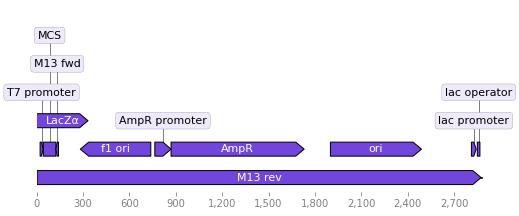

In [6]:
BiopythonTranslator().translate_record(plasmid).plot()

In [7]:
plasmid.features = []

(<AxesSubplot:>, ({}, {}))

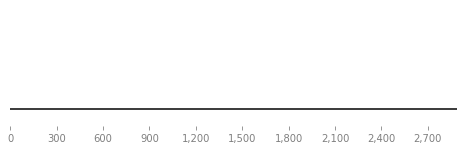

In [8]:
BiopythonTranslator().translate_record(plasmid).plot()

---
Auto-annotate

In [21]:
blocks = CommonBlocks.from_sequences(vectors + [plasmid], min_block_size=10)
results = blocks.copy_features_between_common_blocks(inplace=False)
#~ blocks.plot_common_blocks()

(<AxesSubplot:>,
 ({GF(lac promoter, 2813-2844 (1)): 0},
  {GF(lac promoter, 2813-2844 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

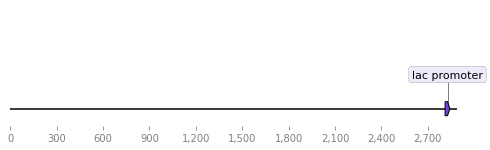

In [20]:
BiopythonTranslator().translate_record(results["pT7Blue"]).plot()